# L3-E - Linear Quantization II: Quantizing Weights & Activations for Inference

In this lesson, you will continue to learn different ways of performing linear quantization.

Run the next cell to import all of the functions you have used before in the previous lesson(s) of `Linear Quantization II` to follow along with the video.

- To access the `helper.py` file, you can click `File --> Open...`, on the top left.

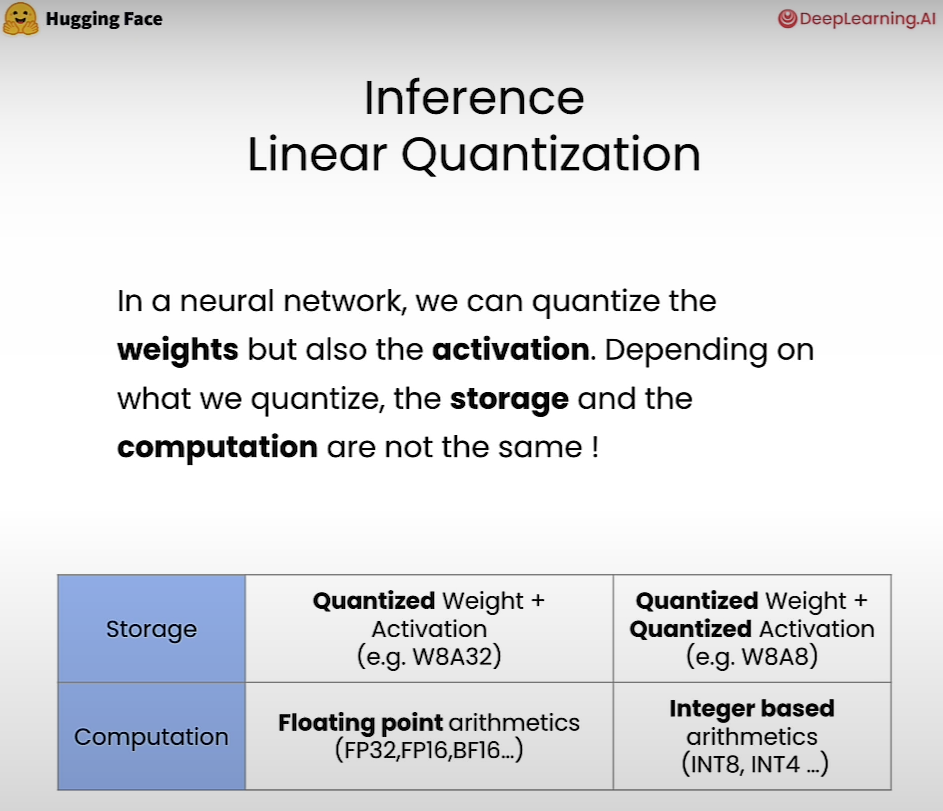

In [ ]:
import torch

from helper import linear_q_symmetric, get_q_scale_symmetric

## Linear Quantization: Inference

- `W8A32` means weights in 8-bits and activations in 32-bits.
- For simplicity, the linear layer will be without bias.

In [ ]:
def quantized_linear_W8A32_without_bias(input, q_w, s_w, z_w):
    assert input.dtype == torch.float32
    assert q_w.dtype == torch.int8

    #dequantized the weights
    dequantized_weight = q_w.to(torch.float32) * s_w + z_w
    # perform a linear with dequantized weights
    output = torch.nn.functional.linear(input, dequantized_weight)
    
    return output

In [ ]:
input = torch.tensor([1, 2, 3], dtype=torch.float32)

In [ ]:
weight = torch.tensor([[-2,   -1.13, 0.42],
                       [-1.51, 0.25, 1.62],
                       [0.23,  1.35, 2.15]])

In [ ]:
q_w, s_w  = linear_q_symmetric(weight)

In [ ]:
q_w

In [ ]:
s_w

In [ ]:
output = quantized_linear_W8A32_without_bias(input,
                                             q_w,
                                             s_w,
                                             0)

In [ ]:
print(f"This is the W8A32 output: {output}")

In [ ]:
fp32_output = torch.nn.functional.linear(input, weight)

In [ ]:
print(f"This is the output if we don't quantize: {fp32_output}")